<a href="https://colab.research.google.com/github/Carinaaa/Workout-decision-tree-viz/blob/main/Workout_decision_tree_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision trees

## Download data from kagglehub

About the dataset:

In [19]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
file_path = kagglehub.dataset_download("jockeroika/life-style-data")


Using Colab cache for faster access to the 'life-style-data' dataset.


## Create a dataframe to visualize and process the data

Questions to be answered:

1. How much data there is?
2. Are there any NaN values?
3. Is there any categorical data?

In [20]:
import pandas as pd

# Define the path to the copied file
file_path = '/kaggle/input/life-style-data/Final_data.csv'

print("Path to dataset files:", file_path)

# Load the latest version
lifestyle_data_df = pd.read_csv(file_path)

print("First 5 records:", lifestyle_data_df.head())

Path to dataset files: /kaggle/input/life-style-data/Final_data.csv
First 5 records:      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_

In [21]:
# How much data there is?
len(lifestyle_data_df)

20000

In [22]:
# Are there any NaN values?
lifestyle_data_df.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [23]:
# Is there any categorical data?
lifestyle_data_df.dtypes

,0
Age,float64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,float64
Avg_BPM,float64
Resting_BPM,float64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


In [24]:
lifestyle_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

### Let's choose some columns to be used

For this example, let's say we want to see based on age, gender, weight, height, Resting_BPM and lean_mass_kg which workout type you are likely to choose.

In [25]:
lifestyle_data_df['Workout_Type'].unique()

array(['Strength', 'HIIT', 'Cardio', 'Yoga'], dtype=object)

In [26]:
X = lifestyle_data_df[['Age','Gender','Weight (kg)', 'Height (m)', 'Resting_BPM', 'lean_mass_kg']]
y = lifestyle_data_df['Workout_Type']

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_gender = transformer.fit_transform(X)
transformed_gender

array([[ 0.        ,  1.        , 34.91      , ...,  1.62      ,
        69.05      , 47.77739382],
       [ 1.        ,  0.        , 23.37      , ...,  1.55      ,
        73.18      , 40.80980268],
       [ 1.        ,  0.        , 33.2       , ...,  1.67      ,
        54.96      , 44.6355797 ],
       ...,
       [ 0.        ,  1.        , 50.31      , ...,  1.67      ,
        61.65      , 35.42070756],
       [ 0.        ,  1.        , 52.36      , ...,  1.62      ,
        60.88      , 35.88926031],
       [ 0.        ,  1.        , 29.56      , ...,  1.61      ,
        72.05      , 44.30323663]])

In [28]:
transformed_X = pd.get_dummies(X)
transformed_X.head()


,Age,Weight (kg),Height (m),Resting_BPM,lean_mass_kg,Gender_Female,Gender_Male
0,34.91,65.27,1.62,69.05,47.777394,False,True
1,23.37,56.41,1.55,73.18,40.809803,True,False
2,33.20,58.98,1.67,54.96,44.635580,True,False
3,38.69,93.78,1.70,50.07,63.007432,True,False
4,45.09,52.42,1.88,70.84,43.347504,False,True


### Split the dataset into training and testing data

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

### Let's create a model and check the metrics

In [62]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=100,
    min_samples_split=10
)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.25225

In [68]:
from sklearn.metrics import classification_report

y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

      Cardio       0.26      0.05      0.09       944
        HIIT       0.24      0.01      0.02      1023
    Strength       0.25      0.93      0.40      1007
        Yoga       0.25      0.02      0.03      1026

    accuracy                           0.25      4000
   macro avg       0.25      0.25      0.13      4000
weighted avg       0.25      0.25      0.13      4000



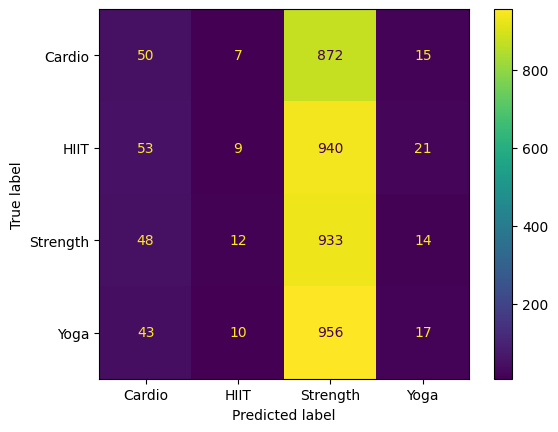

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

In [63]:
def hierarchy_pos(G, root=0, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = {root: (xcenter, vert_loc)}
    children = list(G.successors(root))
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width / 2 - dx / 2
        for child in children:
            nextx += dx
            pos.update(hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc - vert_gap, xcenter=nextx))
    return pos

In [64]:
y.head()

,Workout_Type
0,Strength
1,HIIT
2,Cardio
3,HIIT
4,Strength


In [65]:
import networkx as nx

tree = clf.tree_
feature_names = transformed_X.columns # Use the column names from the transformed features
G = nx.DiGraph()

def add_nodes_edges(node_id=0, parent=None, weight=False):
    classes = y.unique() # Use unique workout types from y
    if node_id == -1:
        return

    # Label node
    if tree.children_left[node_id] == tree.children_right[node_id]:
        label = f"Leaf\nClass={classes[tree.value[node_id].argmax()]}"
    else:
        feat = feature_names[tree.feature[node_id]]
        thresh = tree.threshold[node_id]
        label = f"{feat}\n<= {thresh:.2f}"

    G.add_node(node_id, label=label)

    # connect to parent
    if parent is not None:
      G.add_edge(parent, node_id, weight = weight)

    # recurse children
    left, right = tree.children_left[node_id], tree.children_right[node_id]
    if left != -1:
        add_nodes_edges(left, node_id, False)
    if right != -1:
        add_nodes_edges(right, node_id, True)

add_nodes_edges() # Call the function to build the graph

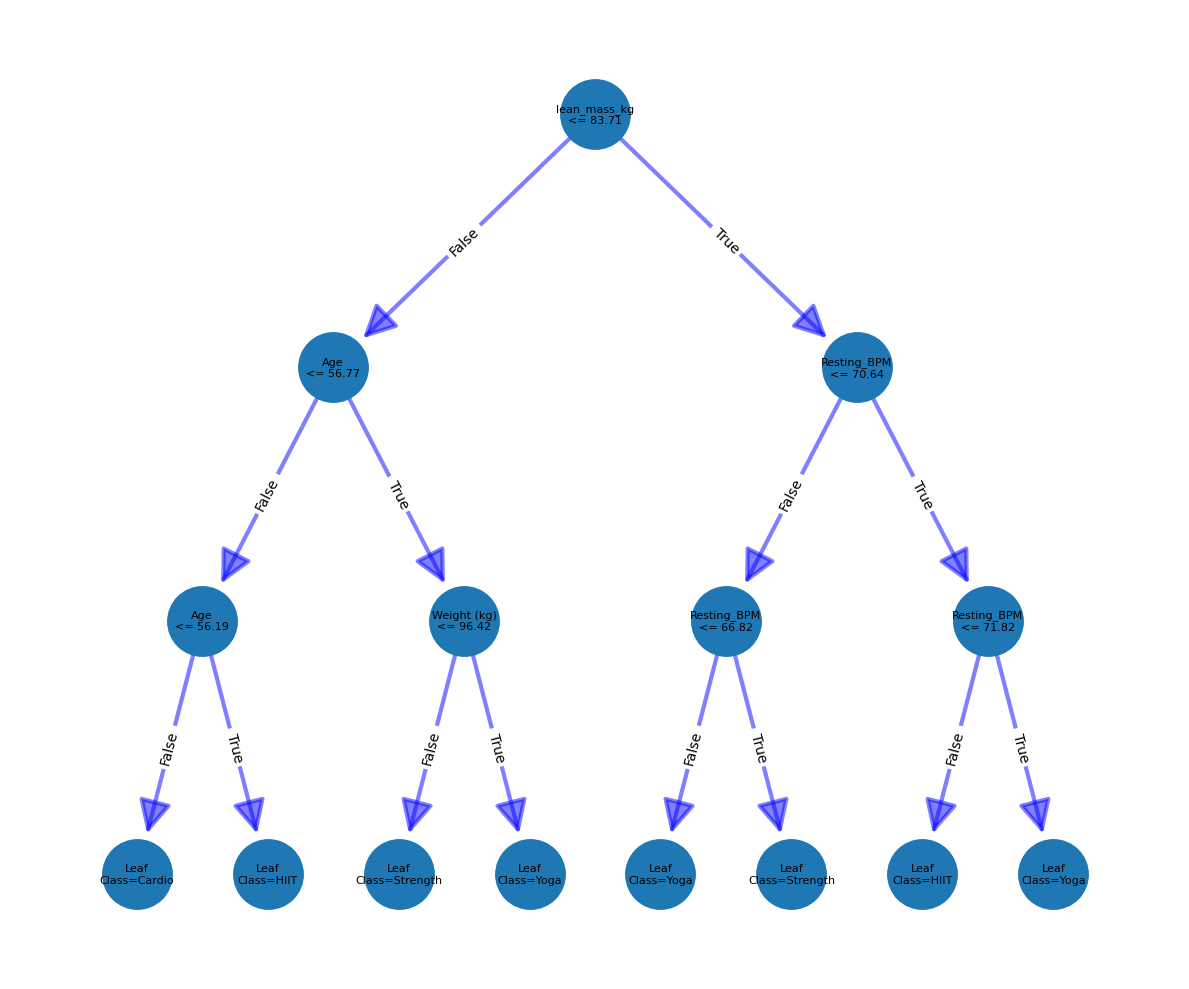

In [66]:
import matplotlib.pyplot as plt

add_nodes_edges()

labels = nx.get_node_attributes(G, "label")

plt.figure(figsize=(12, 10))

pos = hierarchy_pos(G, root=0)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2500)

# edges
nx.draw_networkx_edges(
    G,
    pos,
    width=3,
    alpha=0.5,
    edge_color="b",
    arrowstyle='-|>',
    arrowsize=50,
    min_source_margin = 20,
    min_target_margin = 30
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif",
    labels=labels)

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()